# Feature engineering with GeoPandas

It is short example of feature engineering with GeoPandas. If we analyze spatial processes we cannot forget about spatial data! Sometimes we can get nice features for machine learning problems which were virtually hidden from us and from model.

Our task is divided into five parts:

1. Load point data and transform it from simple DataFrame to GeoDataFrame.
2. Create distance to borough centroid feature (numerical).
3. Create: school district id, fire division id, police precint id and health center id columns.
4. Check distribution of categorical features vs price.
5. Check correlation between numerical values and price.

## Step 1: Load point data and transform it from simple DataFrame to GeoDataFrame

- import packages: _numpy_, _pandas_, _geopandas_, _matplotlib.pyplot_, from _shapely.geometry_ import _Point_,
- read ```AB_NYC_2019.csv``` file, set ```id``` as an index column,
- create column with ```Point``` geometry, and drop unwanted columns to have: ```['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'geometry']```,
- set _crs_ od _GeoDataFrame_ to **EPSG:4326**,
- load other spatial datasets: Boroughs (```nybbwi_20d/nybbwi.shp```), fire divisions (```nyfd_20d/nyfd.shp```), police precints (```nypp_20d/nypp.shp```), school districts (```nysd_20d/nysd.shp```) and health centres (```nyhc_20d/nyhc.shp```). Plot them and check info about their structure,
- check if all datasets have the same crs,
- transform crs of datasets if it's different (you may transform Point's crs or Polygon's crs. It's up to you).

In [1]:
# Import packages

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [2]:
# Read NYC airbnb data

df = pd.read_csv('AB_NYC_2019.csv', index_col='id')
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [4]:
# Transform geometry

def lat_lon_to_point(dataframe, lon_col='longitude', lat_col='latitude'):
    """Function transform longitude and latitude coordinates into GeoSeries.
    
    INPUT:
    
    :param dataframe: DataFrame to be transformed,
    :param lon_col: (str) longitude column name, default is 'longitude',
    :param lat_col: (str) latitude column name, default is 'latitude'.
    
    OUTPUT:
    
    :return: (GeoPandas GeoSeries object)
    """

    geometry = dataframe.apply(lambda x: Point([x[lon_col], x[lat_col]]), axis=1)
    geoseries = gpd.GeoSeries(geometry)
    geoseries.name = 'geometry'
    
    return geoseries

In [5]:
gdf = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews',
         'reviews_per_month', 'calculated_host_listings_count']]
geometry = lat_lon_to_point(df)
gdf = gdf.join(geometry)

In [6]:
gdf.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,geometry
id,,,,,,,,,
2539,Brooklyn,Kensington,Private room,149,1,9,0.21,6,POINT (-73.97237 40.64749)
2595,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,POINT (-73.98377 40.75362)
3647,Manhattan,Harlem,Private room,150,3,0,NaN,1,POINT (-73.94190 40.80902)
3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,POINT (-73.95976 40.68514)
5022,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,POINT (-73.94399 40.79851)


In [7]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  object  
 1   neighbourhood                   48895 non-null  object  
 2   room_type                       48895 non-null  object  
 3   price                           48895 non-null  int64   
 4   minimum_nights                  48895 non-null  int64   
 5   number_of_reviews               48895 non-null  int64   
 6   reviews_per_month               38843 non-null  float64 
 7   calculated_host_listings_count  48895 non-null  int64   
 8   geometry                        48895 non-null  geometry
dtypes: float64(1), geometry(1), int64(4), object(3)
memory usage: 5.0+ MB


In [8]:
# Set crs

gdf = gpd.GeoDataFrame(gdf)
gdf.crs = 'EPSG:4326'

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  object  
 1   neighbourhood                   48895 non-null  object  
 2   room_type                       48895 non-null  object  
 3   price                           48895 non-null  int64   
 4   minimum_nights                  48895 non-null  int64   
 5   number_of_reviews               48895 non-null  int64   
 6   reviews_per_month               38843 non-null  float64 
 7   calculated_host_listings_count  48895 non-null  int64   
 8   geometry                        48895 non-null  geometry
dtypes: float64(1), geometry(1), int64(4), object(3)
memory usage: 5.0+ MB


In [10]:
# Load all other spatial datasets

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    5 non-null      int64   
 1   BoroName    5 non-null      object  
 2   Shape_Leng  5 non-null      float64 
 3   Shape_Area  5 non-null      float64 
 4   geometry    5 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 328.0+ bytes
None


<AxesSubplot:>

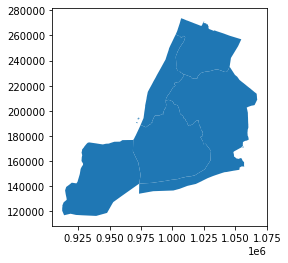

In [11]:
gdf_boroughs = gpd.read_file('nybbwi_20d/nybbwi.shp')
print(gdf_boroughs.info())
gdf_boroughs.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireDiv     9 non-null      int64   
 1   Shape_Leng  9 non-null      float64 
 2   Shape_Area  9 non-null      float64 
 3   geometry    9 non-null      geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 416.0 bytes
None


<AxesSubplot:>

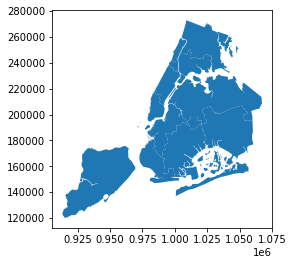

In [12]:
gdf_fire_division = gpd.read_file('nyfd_20d/nyfd.shp')
print(gdf_fire_division.info())
gdf_fire_division.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Precinct    77 non-null     int64   
 1   Shape_Leng  77 non-null     float64 
 2   Shape_Area  77 non-null     float64 
 3   geometry    77 non-null     geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 2.5 KB
None


<AxesSubplot:>

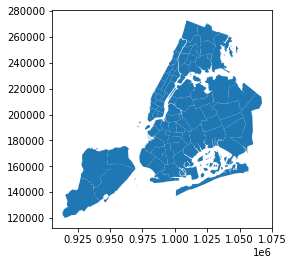

In [13]:
gdf_police_precincts = gpd.read_file('nypp_20d/nypp.shp')
print(gdf_police_precincts.info())
gdf_police_precincts.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SchoolDist  33 non-null     int64   
 1   Shape_Leng  33 non-null     float64 
 2   Shape_Area  33 non-null     float64 
 3   geometry    33 non-null     geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 1.2 KB
None


<AxesSubplot:>

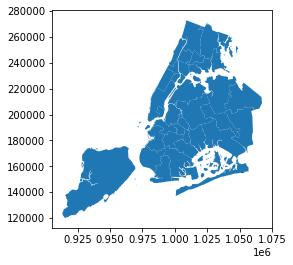

In [14]:
gdf_school_districts = gpd.read_file('nysd_20d/nysd.shp')
print(gdf_school_districts.info())
gdf_school_districts.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    30 non-null     int64   
 1   BoroName    30 non-null     object  
 2   HCentDist   30 non-null     int64   
 3   Shape_Leng  30 non-null     float64 
 4   Shape_Area  30 non-null     float64 
 5   geometry    30 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(1)
memory usage: 1.5+ KB
None


<AxesSubplot:>

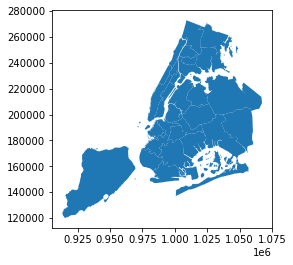

In [15]:
gdf_health_centers = gpd.read_file('nyhc_20d/nyhc.shp')
print(gdf_health_centers.info())
gdf_health_centers.plot()

> **IMPORTANT** Take a look into each dataset. As you may noticed, area divisions among datasets differs. We are not duplicating any records and each dataset bring new knowledge into a feature space.

In [16]:
gdf_boroughs.crs == gdf_fire_division.crs == gdf_health_centers.crs == gdf_police_precincts.crs == gdf_school_districts.crs

True

> **IMPORTANT** Polygons have the same crs because they're all downloaded from a single data source. Our point crs is different. We can transform it's crs to fit into polygons' crs or we can transform projection of all polygons into EPSG:4326. This is your decision. Usually we pick projection with smallest possible geometrical distortion for a given area but sometimes it is more convenient to use popular projections (EPSG:4326 is an example). Transformation of vectors is not so painful as transformation of spatial rasters, so it is better to transform vector into a raster projection than otherwise. (Reprojection of rasters distorts their pixel values and you may lost some information; it works similar to Gaussian filters applied to images and blurs scene).

In [17]:
# Transform point dataset projection

gdf = gdf.to_crs(gdf_boroughs.crs)

**SUMMARY OF PREPROCESSING**

We have:

- Boroughs borders,
- Fire divisions range areas,
- Health centers range areas,
- Police Precints range areas,
- School Districts range areas.

We can assume that every of those utilities has a profund effect on the price of renting. So we create few features:

1. Distance from each point to each borough's centroid.
2. Categories of Fire Division, Health Center, Police Precint and School District of the point.

## Step 2: Distances from each point to each borough's centroid

Use ```centroid``` attribute and ```distance``` method of GeoDataFrame objects.

In [18]:
# Get boroughs centroids

gdf_boroughs['centroids'] = gdf_boroughs.centroid

In [19]:
# Create new columns

cent = 'cent_'

for idx, row in gdf_boroughs.iterrows():
    cent_name = cent + row['BoroName']
    gdf[cent_name] = gdf['geometry'].distance(row['centroids'])

In [20]:
gdf.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,geometry,cent_Manhattan,cent_Bronx,cent_Brooklyn,cent_Queens,cent_Staten Island
id,,,,,,,,,,,,,,
2539,Brooklyn,Kensington,Private room,149,1,9,0.21,6,POINT (991917.306 175175.801),46182.769343,80563.504775,7807.517142,42786.797159,55674.183036
2595,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,POINT (988746.581 213841.392),8432.312799,50190.620449,44336.899043,48413.994684,80871.576220
3647,Manhattan,Harlem,Private room,150,3,0,NaN,1,POINT (1000333.625 234030.386),14861.711823,28577.640028,63545.862436,52966.580368,104116.699204
3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,POINT (995410.253 188894.145),32583.201814,66660.239092,18581.696468,36235.081058,66528.530090
5022,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,POINT (999757.504 230200.853),11394.696463,31181.127174,59700.711073,50287.338986,100590.416810


## Step 3: Create: school district id, fire division id, police precint id and health center id columns

How? Just join every external dataframe to points GeoDataFrame. Check if points is ```within``` area.

In [21]:
# Add fire divisions

gdf2 = gpd.sjoin(gdf, gdf_fire_division[['geometry', 'FireDiv']], how='left', op='within')
gdf2.drop('index_right', axis=1, inplace=True)

In [22]:
gdf2.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,geometry,cent_Manhattan,cent_Bronx,cent_Brooklyn,cent_Queens,cent_Staten Island,FireDiv
id,,,,,,,,,,,,,,,
2539,Brooklyn,Kensington,Private room,149,1,9,0.21,6,POINT (991917.306 175175.801),46182.769343,80563.504775,7807.517142,42786.797159,55674.183036,11.0
2595,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,POINT (988746.581 213841.392),8432.312799,50190.620449,44336.899043,48413.994684,80871.576220,3.0
3647,Manhattan,Harlem,Private room,150,3,0,NaN,1,POINT (1000333.625 234030.386),14861.711823,28577.640028,63545.862436,52966.580368,104116.699204,6.0
3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,POINT (995410.253 188894.145),32583.201814,66660.239092,18581.696468,36235.081058,66528.530090,11.0
5022,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,POINT (999757.504 230200.853),11394.696463,31181.127174,59700.711073,50287.338986,100590.416810,3.0


In [23]:
# Add Health Centers

gdf2 = gpd.sjoin(gdf2, gdf_health_centers[['geometry', 'HCentDist']], how='left', op='within')
gdf2.drop('index_right', axis=1, inplace=True)

In [24]:
# Add Police Precints

gdf2 = gpd.sjoin(gdf2, gdf_police_precincts[['geometry', 'Precinct']], how='left', op='within')
gdf2.drop('index_right', axis=1, inplace=True)

In [25]:
# Add School Districts

gdf2 = gpd.sjoin(gdf2, gdf_school_districts[['geometry', 'SchoolDist']], how='left', op='within')
gdf2.drop('index_right', axis=1, inplace=True)

## Step 4: Check distribution of categorical features vs price

In [26]:
# First check columns dtypes

gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  object  
 1   neighbourhood                   48895 non-null  object  
 2   room_type                       48895 non-null  object  
 3   price                           48895 non-null  int64   
 4   minimum_nights                  48895 non-null  int64   
 5   number_of_reviews               48895 non-null  int64   
 6   reviews_per_month               38843 non-null  float64 
 7   calculated_host_listings_count  48895 non-null  int64   
 8   geometry                        48895 non-null  geometry
 9   cent_Manhattan                  48895 non-null  float64 
 10  cent_Bronx                      48895 non-null  float64 
 11  cent_Brooklyn                   48895 non-null  float64 
 12  cent

In [27]:
gdf2.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'geometry', 'cent_Manhattan',
       'cent_Bronx', 'cent_Brooklyn', 'cent_Queens', 'cent_Staten Island',
       'FireDiv', 'HCentDist', 'Precinct', 'SchoolDist'],
      dtype='object')

In [28]:
# Change ['FireDiv', 'HCentDist', 'Precinct', 'SchoolDist'] columns to categorical type

categorical_columns = ['FireDiv', 'HCentDist', 'Precinct', 'SchoolDist']

for col in categorical_columns:
    gdf2[col] = gdf2[col].astype('category', copy=False)

In [29]:
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  object  
 1   neighbourhood                   48895 non-null  object  
 2   room_type                       48895 non-null  object  
 3   price                           48895 non-null  int64   
 4   minimum_nights                  48895 non-null  int64   
 5   number_of_reviews               48895 non-null  int64   
 6   reviews_per_month               38843 non-null  float64 
 7   calculated_host_listings_count  48895 non-null  int64   
 8   geometry                        48895 non-null  geometry
 9   cent_Manhattan                  48895 non-null  float64 
 10  cent_Bronx                      48895 non-null  float64 
 11  cent_Brooklyn                   48895 non-null  float64 
 12  cent

In [30]:
# Import seaborn and plot boxplots for each spatial category

import seaborn as sns

In [31]:
# Show categorical

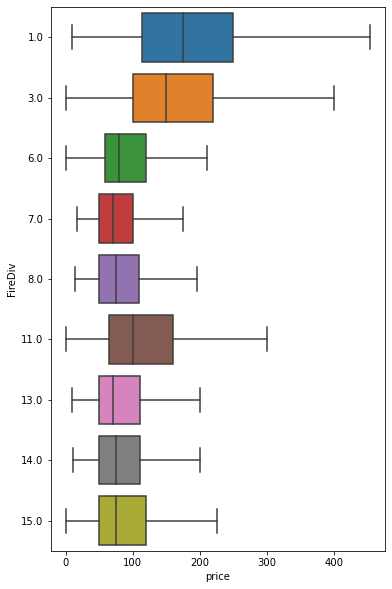

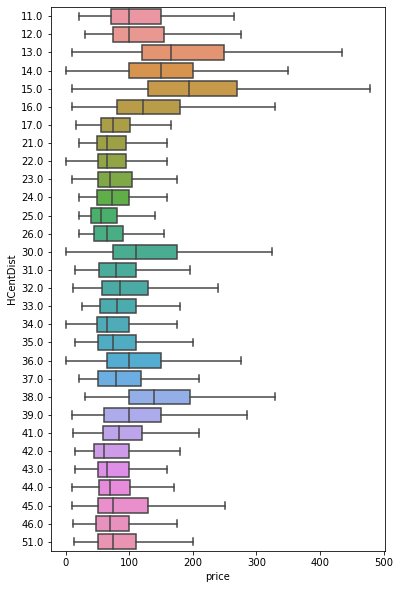

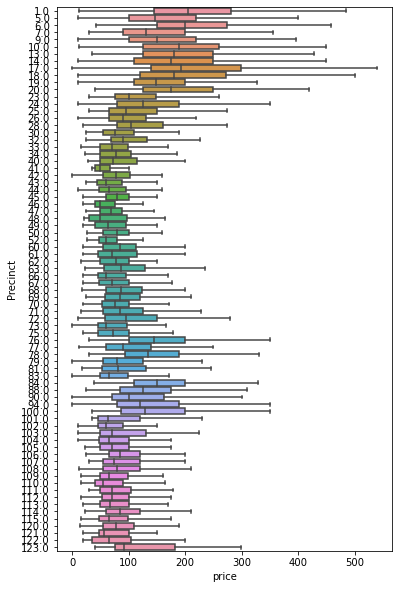

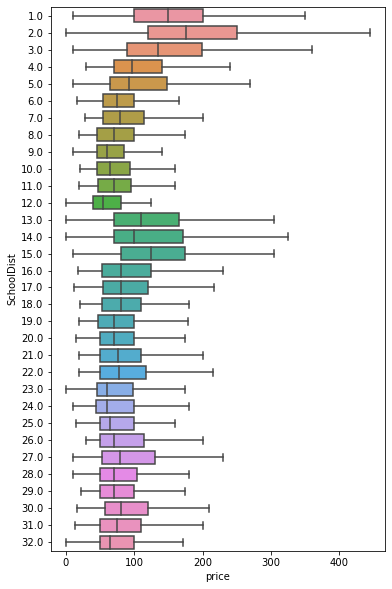

In [32]:
for cat in categorical_columns:
    plt.figure(figsize=(6, 10))
    sns.boxplot(y=cat, x='price', data=gdf2, orient='h', showfliers=False)

## Step 5: Check linear correlation between numerical variables and price

In [33]:
# Check corr with numerical

gdf2.corrwith(gdf2['price'])

price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.030608
calculated_host_listings_count    0.057472
cent_Manhattan                   -0.138039
cent_Bronx                        0.009832
cent_Brooklyn                     0.021219
cent_Queens                       0.100943
cent_Staten Island               -0.051738
dtype: float64

## Now your's turn! Good luck!

---